# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
bc_df = pd.read_csv('insurance.csv')

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
bc_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [3]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
print("distribution of charges column has right tail side and outliers are present in right side tail.")

distribution of charges column has right tail side and outliers are present in right side tail.


# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [5]:
bc_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


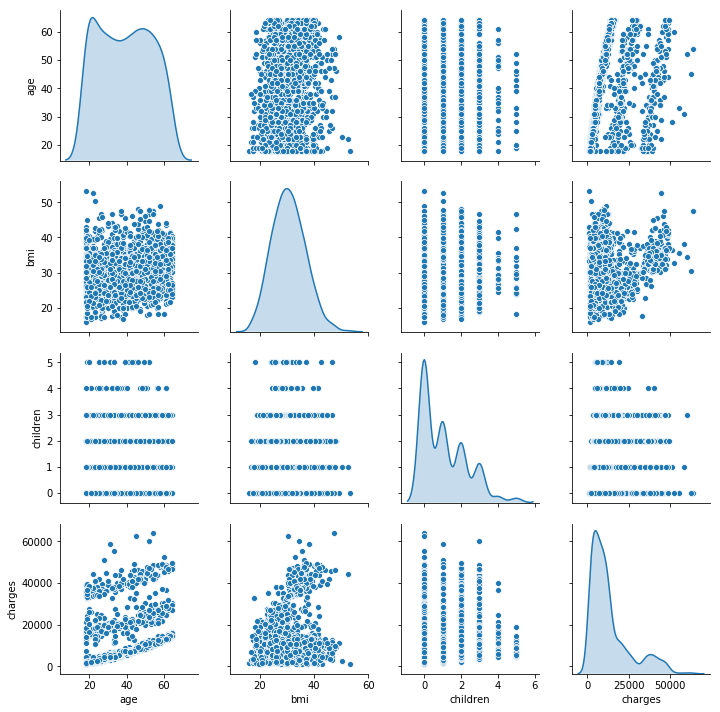

In [6]:
import seaborn as sns
sns.pairplot(bc_df , diag_kind = "kde")

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [7]:
from sklearn.model_selection import train_test_split

X =  bc_df.drop("charges", axis=1)
y =  bc_df["charges"]

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [8]:
X['smoker'] = X.smoker.astype('category')
X['sex'] = X.sex.astype('category')

In [9]:
cleanup_nums = {"northeast": 1, "northwest": 0, "southeast": 2, "southwest": 3}
X.replace(cleanup_nums, inplace=True)

In [10]:
sex_nums = {"male": 1, "female": 0}
X.replace(sex_nums, inplace=True)

In [11]:
smoke_nums = {"yes": 1, "no": 0}
X.replace(smoke_nums, inplace=True)

In [12]:
X.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
dtype: object

# Question 6 - Train your model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [14]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
regression_model.score(X_test, y_test)

0.7328909135306443

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [16]:
regression_model.score(X_test, y_test)

0.7328909135306443

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [17]:
Iris=pd.read_csv('iris.csv')
#Iris
Iris.set_index(Iris.columns[0])
Iris.dtypes
Iris
Iris.groupby(['species']).count()

,sepal length,sepal width,petal length,petal width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [18]:
Iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object

In [19]:
Iris["sepal length"]=Iris["sepal length"].astype(int)
Iris["sepal width"]=Iris["sepal width"].astype(int)
Iris["petal length"]=Iris["petal length"].astype(int)
Iris["petal width"]=Iris["petal width"].astype(int)
Iris.dtypes

sepal length     int32
sepal width      int32
petal length     int32
petal width      int32
species         object
dtype: object

In [20]:
Iris['species'] = Iris.species.astype('category')
class_nums = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
Iris.replace(class_nums, inplace=True)

In [21]:
X =  Iris.drop("species", axis=1)
y =  Iris.pop("species")


In [22]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0


## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


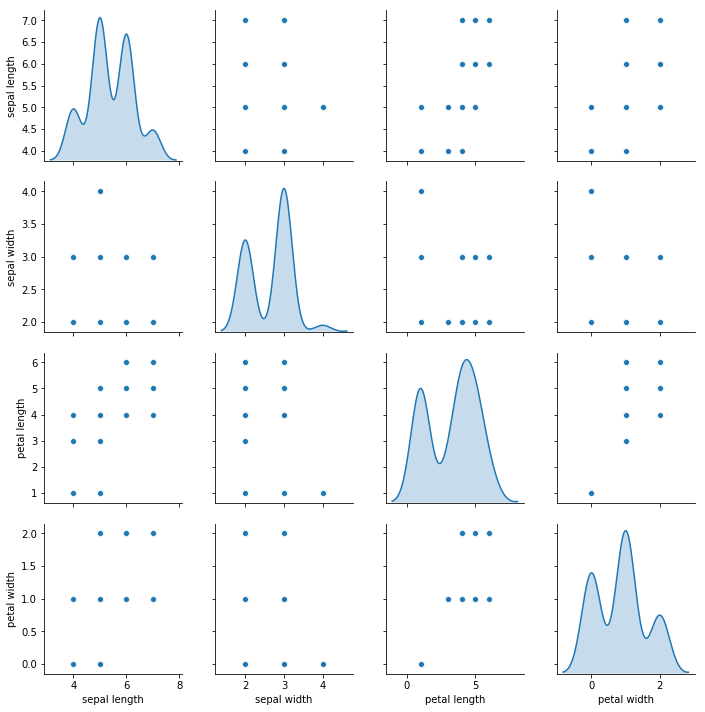

In [23]:
import seaborn as sns
sns.pairplot(Iris , diag_kind = "kde")

## Question 11- Do Feature Scaling 

In [24]:
X_z = X.apply(zscore)  # convert all attributes to Z scale 

X_z.describe()

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.406282e-17,4.736952e-16,2.827368e-16,3.521257e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.652877e+00,-1.218128e+00,-1.306042e+00,-1.207719e+00
25%,-4.608984e-01,-1.218128e+00,-1.306042e+00,-1.207719e+00
50%,-4.608984e-01,6.655750e-01,3.925674e-01,1.966054e-01
75%,7.310803e-01,6.655750e-01,9.587705e-01,1.966054e-01
max,1.923059e+00,2.549278e+00,1.524974e+00,1.600930e+00


## Question 12- Train and Fit NaiveBayes Model

In [30]:
train_set, test_set, train_labels, test_labels = train_test_split(X_z, y, test_size=0.30, random_state=1)

In [31]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [32]:
model.score(train_set , train_labels) 

0.8476190476190476

In [33]:
test_pred = model.predict(test_set)

#print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  4  9]]


In [34]:
test_acc=metrics.accuracy_score(test_labels,test_pred)
print(test_acc)

0.9111111111111111


# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [35]:
#Dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0 )
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )
Rf_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_predict_Rf=Rf_model.predict(test_set)
Rf_acc=metrics.accuracy_score(test_labels,y_predict_Rf)
print(Rf_acc)

0.9777777777777777


In [41]:
Rf_cr=metrics.classification_report(test_labels , y_predict_Rf)
print(Rf_cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.94      0.97        18
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(train_set, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
y_predict_gbcl=gbcl.predict(test_set)
gbcl_acc=metrics.accuracy_score(test_labels,y_predict_gbcl)
print(gbcl_acc)

0.9777777777777777


In [39]:
gbcl_cr=metrics.classification_report(test_labels , y_predict_gbcl)
print(gbcl_cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.94      0.97        18
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45

